In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import pickle

In [2]:
#importing data
X_train=pd.read_csv('../datasets/X_train.csv',index_col="Id")

In [3]:
#importing data
X_test=pd.read_csv('../datasets/X_test.csv',index_col="Id")


In [4]:
y_train= pd.read_pickle('../datasets/y_train.csv')

In [5]:
y_test= pd.read_pickle('../datasets/y_test.csv')

In [6]:
columns = X_train.columns.to_list()

## Scale the data

In [7]:
ss = StandardScaler()

In [8]:
X_train = ss.fit_transform(X_train)

In [9]:
X_test = ss.transform(X_test)

## Export scaler

In [10]:
with open('../assets/scaler.pkl', 'wb+') as f:
    pickle.dump(ss, f)

## Model Prep: `logTransformer`

In [11]:
# pt = PowerTransformer()
# pt.fit(X_train_sc)
# X_train = pt.transform(X_train_sc)
# X_test= pt.transform(X_test_sc)

In [12]:
# X_train.shape

In [13]:
# with open('../assets/transformer_x.pkl', 'wb+') as f:
#     pickle.dump(pt, f)

In [14]:
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train_pt= pt_y.transform(y_train.to_frame())
y_test_pt= pt_y.transform(y_test.to_frame())


In [15]:
with open('../assets/transformer_y.pkl', 'wb+') as f:
    pickle.dump(pt_y, f)

## Model Prep: Instantiate our model

In [16]:
lr = LinearRegression()

In [17]:
lr_lasso = LassoCV(n_alphas=200, cv=5,max_iter=2000,eps=0.0001)

In [18]:
lr_ridge = RidgeCV(alphas=np.linspace(.1, 20, 100))

## Cross validation

In [19]:
lr.fit(X_train, y_train_pt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.score(X_train, y_train_pt)

0.9581243885118141

In [21]:
lr_lasso_scores = cross_val_score(lr_lasso, X_train, y_train_pt[:, 0], cv=3)
lr_lasso_scores.mean()

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0812819955975499, tolerance: 0.07542424156914301
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09778141607458934, tolerance: 0.07542424156914301
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09055138486903047, tolerance: 0.07542424156914301
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarnin

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10010056342082407, tolerance: 0.07596089915097518
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08579054733966274, tolerance: 0.07596089915097518
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07782434527182147, tolerance: 0.07596089915097518
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarni

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09753761965941976, tolerance: 0.07928735532508242
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10068685909980957, tolerance: 0.07928735532508242
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14224766511056686, tolerance: 0.07928735532508242
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarni

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18229097345579248, tolerance: 0.07928735532508242
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14116492716087237, tolerance: 0.07928735532508242
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09238321678197892, tolerance: 0.0768898340129495
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarnin

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08847209783253263, tolerance: 0.07665092267785724
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11209799427747669, tolerance: 0.07665092267785724
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2427987963391942, tolerance: 0.07665092267785724
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarnin

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1421730024350829, tolerance: 0.07654601644470566
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14813087731102215, tolerance: 0.07654601644470566
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1586467322781573, tolerance: 0.07654601644470566
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11262788093061715, tolerance: 0.0780294809854888
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10444853280216648, tolerance: 0.0780294809854888
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11913463732651763, tolerance: 0.0780294809854888
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning:

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9860302236553551, tolerance: 0.07737914856996092
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.099791459759679, tolerance: 0.07737914856996092
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.232277736464475, tolerance: 0.07737914856996092
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: O

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09728229452628767, tolerance: 0.08122914532022979
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10233922063554246, tolerance: 0.08122914532022979
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1067894898780608, tolerance: 0.08122914532022979
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarnin

0.8426409487015957

In [22]:
lr_ridge_scores = cross_val_score(lr_ridge, X_train, y_train_pt, cv=3)
lr_ridge_scores.mean()

0.8645189420605147

## Model Fitting 

In [23]:
lr_ridge=lr_ridge.fit(X_train, y_train_pt)

In [24]:
lr_ridge.score(X_train, y_train_pt)

0.9517590161833273

In [25]:
lr_lasso=lr_lasso.fit(X_train, y_train_pt)

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12753234319340123, tolerance: 0.11681514176029667
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18539002391049308, tolerance: 0.11681514176029667
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Ob

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21164561081684496, tolerance: 0.12011204399550023
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2757738709986626, tolerance: 0.12011204399550023
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2834314903670716, tolerance: 0.12011204399550023
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning

In [26]:
lr_lasso.score(X_train, y_train_pt)

0.9493295340884716

In [27]:
#lr_lasso.coef_

In [28]:
#coef = pd.Series(lr_lasso.coef_, index = X_train.columns)

In [29]:
#print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

## and Evaluation Ridge

In [30]:
lr_ridge.score(X_train, y_train_pt)

0.9517590161833273

In [31]:
lr_ridge.score(X_test, y_test_pt)

0.9073583578655775

In [32]:
lr_ridge_scores.mean()

0.8645189420605147

## and Evaluation Lasso

In [33]:
lr_lasso.score(X_train, y_train_pt)

0.9493295340884716

In [34]:
lr_lasso.score(X_test, y_test_pt)

0.8956016037549804

In [35]:
lr_lasso_scores.mean()

0.8426409487015957

## Make prediction

In [36]:
pred_train =lr_lasso.predict(X_train)

In [37]:
pred_test = lr_lasso.predict(X_test)

In [38]:
# The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
pred_reversed_train = pt_y.inverse_transform(pred_train.reshape(-1,1))

In [39]:
# The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
pred_reversed_test = pt_y.inverse_transform(pred_test.reshape(-1,1))

In [40]:
def model_score(y_true,y_hat):
    RMSE = round(mean_squared_error(y_true , y_hat)**0.5,2)
    R2 = round(r2_score(y_true,y_hat),3)
    MAE = round(mean_absolute_error(y_true,y_hat),2)
    MedAE = round(median_absolute_error(y_true,y_hat),2)
    print(f'Mean Absolute Error: {MAE}\nMedian Absolute Error: {MedAE}\nRoot Mean Squared Error: {RMSE}\nR2: {R2}')

In [41]:
model_score(y_test,pred_reversed_test)

Mean Absolute Error: 12682.3
Median Absolute Error: 8091.45
Root Mean Squared Error: 20372.4
R2: 0.89


In [42]:
model_score(y_train,pred_reversed_train)

Mean Absolute Error: 9397.63
Median Absolute Error: 6886.18
Root Mean Squared Error: 12925.85
R2: 0.952


In [43]:
def mlr_residual_visualizer(y_true, y_hat):
    plt.figure(figsize = (20,10))
    plt.scatter(y_hat,y_true, c = '#7D1B7E');
    plt.plot((0,np.max(y_true)),(0,np.max(y_true)), c = 'red'); # identity line
    plt.xlabel("Predicted Sale Price: $\hat{y}$", fontsize = 20);
    plt.xticks(fontsize = 40)
    plt.ylabel("Actual Sale Price: $y$", fontsize = 20);
    plt.title("$\hat{y}$ vs. $y$", fontsize = 40);
    plt.legend(['Actual']);
    plt.yticks(fontsize=15);
    plt.xticks(fontsize=15);

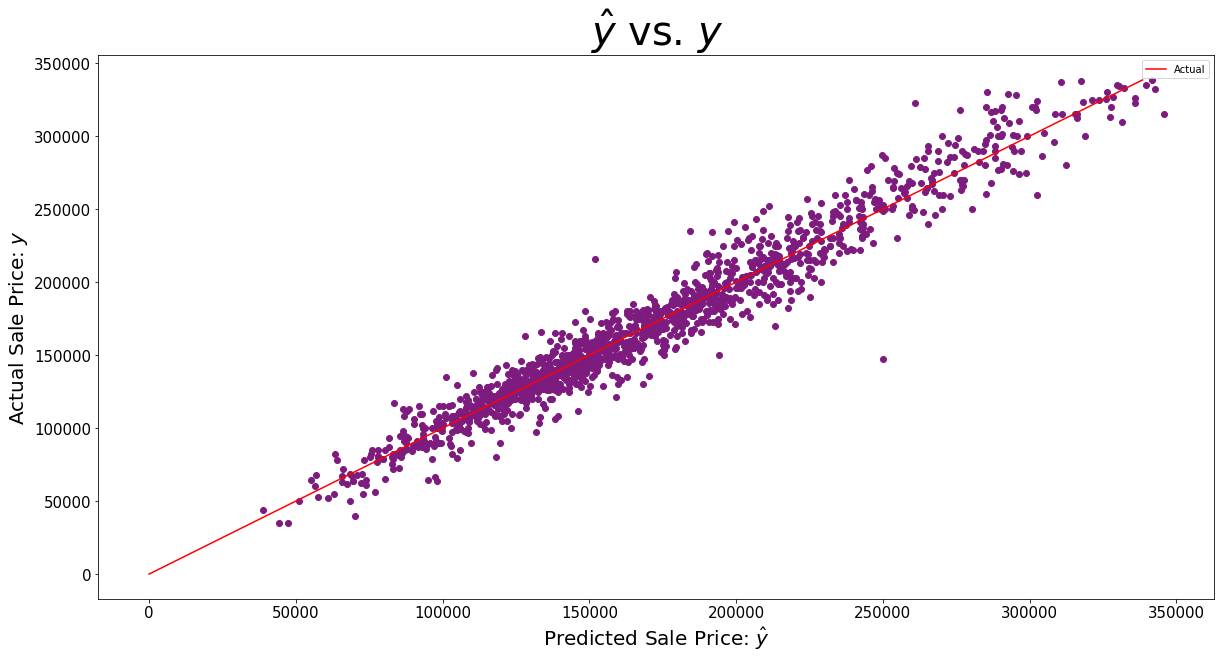

In [44]:
# VISUALIZE FOR YOUR TRAIN
mlr_residual_visualizer(y_train, pred_reversed_train)
plt.savefig('../plots/train_prediction.png', dpi=235)

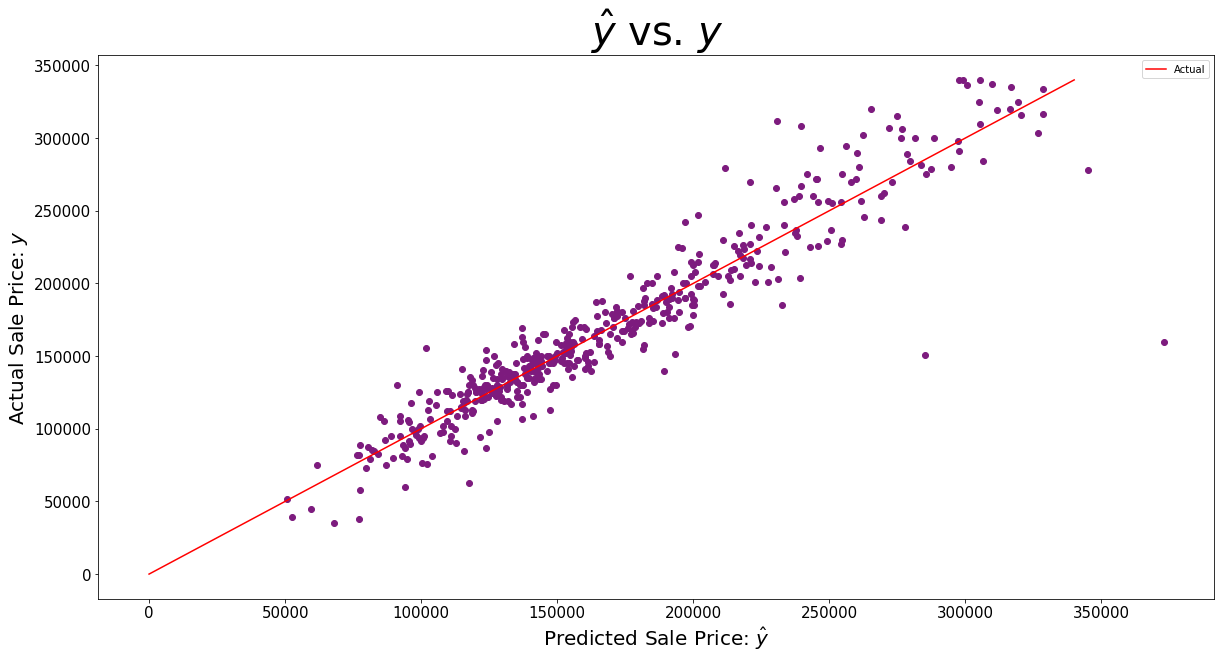

In [45]:
# VISUALIZE FOR YOUR TEST
mlr_residual_visualizer(y_test,pred_reversed_test)
plt.savefig('../plots/test_prediction.png', dpi=235)

In [46]:

# for i,items in enumerate(pred_reversed_test):
#     if items>350_000:
#         print(i,items)

In [47]:
# y_test.reset_index()["SalePrice"][438]

In [48]:
# Reminders
print(" ridge ".center(18, "="))
print(lr_ridge.score(X_train, y_train_pt))
print(lr_ridge.score(X_test, y_test_pt))
print("ridge optimal alph is"+str(lr_ridge.alpha_))
print()
print(" lasso ".center(18, "="))
print(lr_lasso.score(X_train, y_train_pt))
print(lr_lasso.score(X_test, y_test_pt))
print("lasso optimal alph is"+str(lr_lasso.alpha_))

===== ridge ======
0.9517590161833273
0.9073583578655775
ridge optimal alph is20.0

===== lasso ======
0.9493295340884716
0.8956016037549804
lasso optimal alph is0.0010221502960504178


## Improving model

## Scale the data

In [49]:
 ss = StandardScaler()

In [50]:
 X_train= ss.fit_transform(X_train)

In [51]:
 X_test= ss.transform(X_test)

## Model Prep: `logTransformer`

In [52]:
# pt = PowerTransformer()
# pt.fit(X_train_sc)
# X_train = pt.transform(X_train_sc)
# X_test= pt.transform(X_test_sc)

In [53]:
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

## Model Prep: Instantiate our model

In [54]:
lr_im = LinearRegression()

In [55]:
lr_lasso_im = LassoCV(alphas=np.logspace(-3,1,100), cv=8)

In [56]:
lr_ridge_im = RidgeCV(alphas=np.logspace(1, 4, 100),scoring="r2",cv=8)

## Cross validation

In [57]:
lr_im.fit(X_train, y_train_pt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr_im.score(X_train, y_train_pt)

0.9582059567721369

In [59]:
lr_lasso_im_scores = cross_val_score(lr_lasso_im, X_train, y_train_pt[:, 0], cv=5)
lr_lasso_im_scores.mean()

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11742341088691433, tolerance: 0.10207767208911414
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11249689675807417, tolerance: 0.0976435430277687
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11405379460570941, tolerance: 0.10320498403864403
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarnin

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7314738863334824, tolerance: 0.11404309877311088
  positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1172535819510756, tolerance: 0.10625473519868224
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15261525625179218, tolerance: 0.1054221870242853
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not

0.8593098967654693

In [60]:
lr_ridge_im_scores = cross_val_score(lr_ridge_im, X_train, y_train_pt, cv=5)
lr_ridge_im_scores.mean()

0.8488311047271242

## Model Fitting 

In [61]:
lr_ridge_im=lr_ridge_im.fit(X_train, y_train_pt)

In [62]:
lr_lasso_im=lr_lasso_im.fit(X_train, y_train_pt)

/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15213628707716254, tolerance: 0.12851756649991217
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13002382488686237, tolerance: 0.12795420547651115
  tol, rng, random, positive)
/home/ramin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Ob

## and Evaluation lasso

In [63]:
lr_lasso_im.score(X_train, y_train_pt)

0.9493956864767829

In [64]:
lr_lasso_im.score(X_test, y_test_pt)

0.8990564611068507

In [65]:
lr_lasso_im_scores.mean()

0.8593098967654693

## and Evaluation ridge

In [66]:
lr_ridge_im.score(X_train, y_train_pt)

0.9499806037452203

In [67]:
lr_ridge_im.score(X_test, y_test_pt)

0.9060354843806306

In [68]:
lr_ridge_im_scores.mean()

0.8488311047271242

## Make prediction

In [69]:
pred_train =lr_lasso_im.predict(X_train)

In [70]:
pred_test = lr_lasso_im.predict(X_test)

In [71]:
# The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
pred_reversed_train = pt_y.inverse_transform(pred_train.reshape(-1,1))

In [72]:
# The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
pred_reversed_test = pt_y.inverse_transform(pred_test.reshape(-1,1))

In [73]:
def model_score(y_true,y_hat):
    RMSE = round(mean_squared_error(y_true , y_hat)**0.5,2)
    R2 = round(r2_score(y_true,y_hat),3)
    MAE = round(mean_absolute_error(y_true,y_hat),2)
    MedAE = round(median_absolute_error(y_true,y_hat),2)
    print(f'Mean Absolute Error: {MAE}\nMedian Absolute Error: {MedAE}\nRoot Mean Squared Error: {RMSE}\nR2: {R2}')

In [74]:
model_score(y_test,pred_reversed_test)

Mean Absolute Error: 12610.47
Median Absolute Error: 8000.99
Root Mean Squared Error: 19876.19
R2: 0.895


In [75]:
model_score(y_train,pred_reversed_train)

Mean Absolute Error: 9392.94
Median Absolute Error: 6864.95
Root Mean Squared Error: 12917.74
R2: 0.952


In [76]:
def mlr_residual_visualizer(y_true, y_hat):
    plt.figure(figsize = (20,10))
    plt.scatter(y_hat,y_true, c = '#7D1B7E');
    plt.plot((0,np.max(y_true)),(0,np.max(y_true)), c = 'red'); # identity line
    plt.xlabel("Predicted Sale Price: $\hat{y}$", fontsize = 20);
    plt.xticks(fontsize = 40)
    plt.ylabel("Actual Sale Price: $y$", fontsize = 20);
    plt.title("$\hat{y}$ vs. $y$", fontsize = 40);
    plt.legend(['Actual']);
    plt.yticks(fontsize=15);
    plt.xticks(fontsize=15);

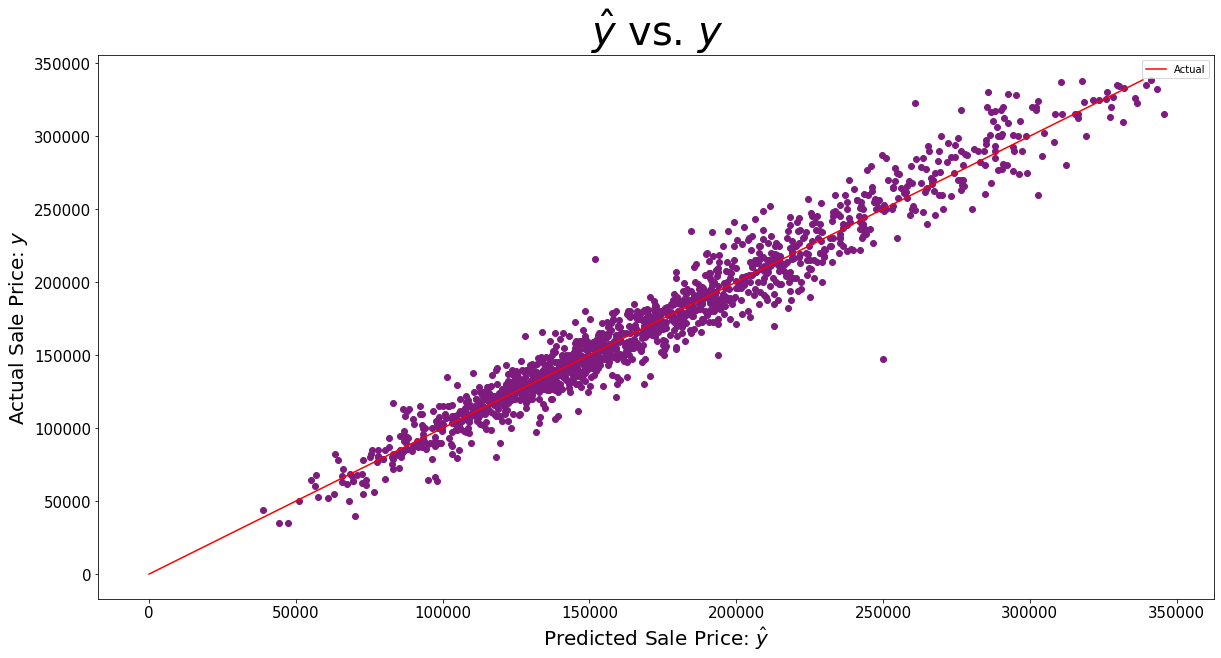

In [77]:
# VISUALIZE FOR YOUR TRAIN
mlr_residual_visualizer(y_train, pred_reversed_train)
plt.savefig('../plots/train_prediction_improved.png', dpi=235)

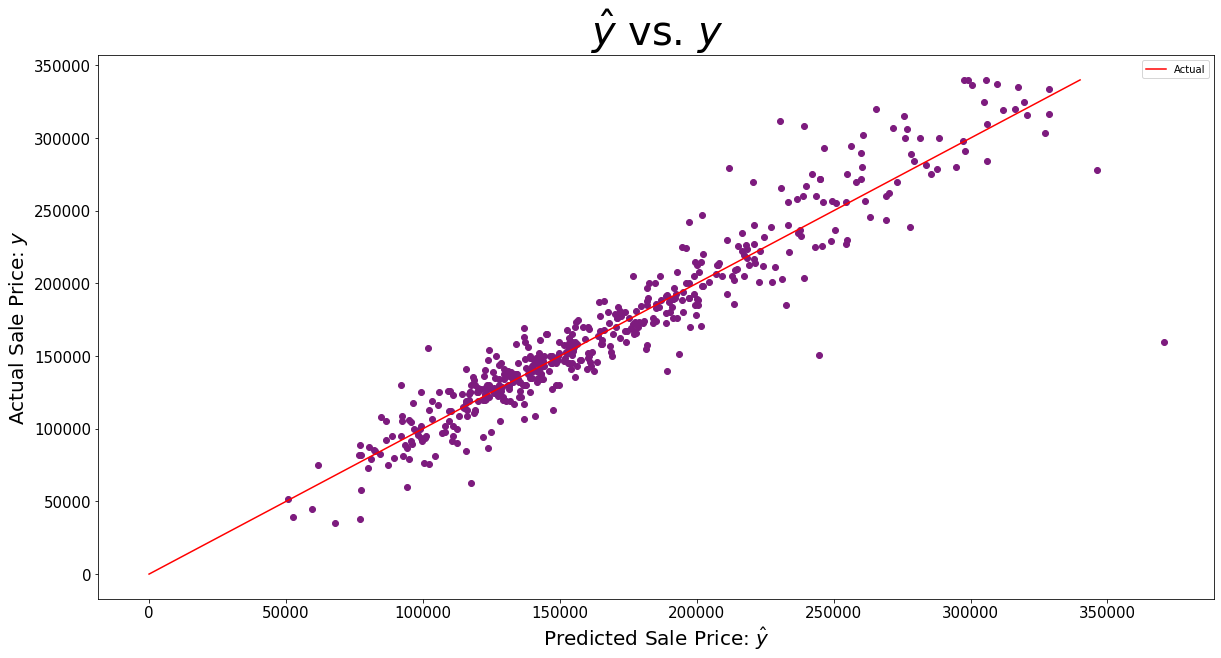

In [78]:
# VISUALIZE FOR YOUR TEST
mlr_residual_visualizer(y_test,pred_reversed_test)
plt.savefig('../plots/test_prediction_improved.png', dpi=235)

In [79]:
# Reminders
print(" ridge ".center(18, "="))
print(lr_ridge_im.score(X_train, y_train_pt))
print(lr_ridge_im.score(X_test, y_test_pt))
print("improved ridge optimal alph is"+str(lr_ridge_im.alpha_))
print()
print("improved lasso ".center(18, "="))
print(lr_lasso_im.score(X_train, y_train_pt))
print(lr_lasso_im.score(X_test, y_test_pt))
print("lasso optimal alph is"+str(lr_lasso_im.alpha_))

===== ridge ======
0.9499806037452203
0.9060354843806306
improved ridge optimal alph is43.28761281083057

=improved lasso ==
0.9493956864767829
0.8990564611068507
lasso optimal alph is0.001


## Final Model

## Create a bar plot of the top 10 coefficients by absolute value of their weights

In [80]:
beta_0 = lr_lasso.intercept_

In [81]:
lr_lasso.coef_.shape=(1,len(columns) )

In [82]:
betas = pd.DataFrame(lr_lasso.coef_,columns=columns).T

In [83]:
betas.columns = ['weights']

In [84]:
betas['abs_w'] = betas.weights.abs()

In [85]:
weights = betas.sort_values('abs_w', ascending=False)['weights'].head(15)

In [86]:
labels = weights.index

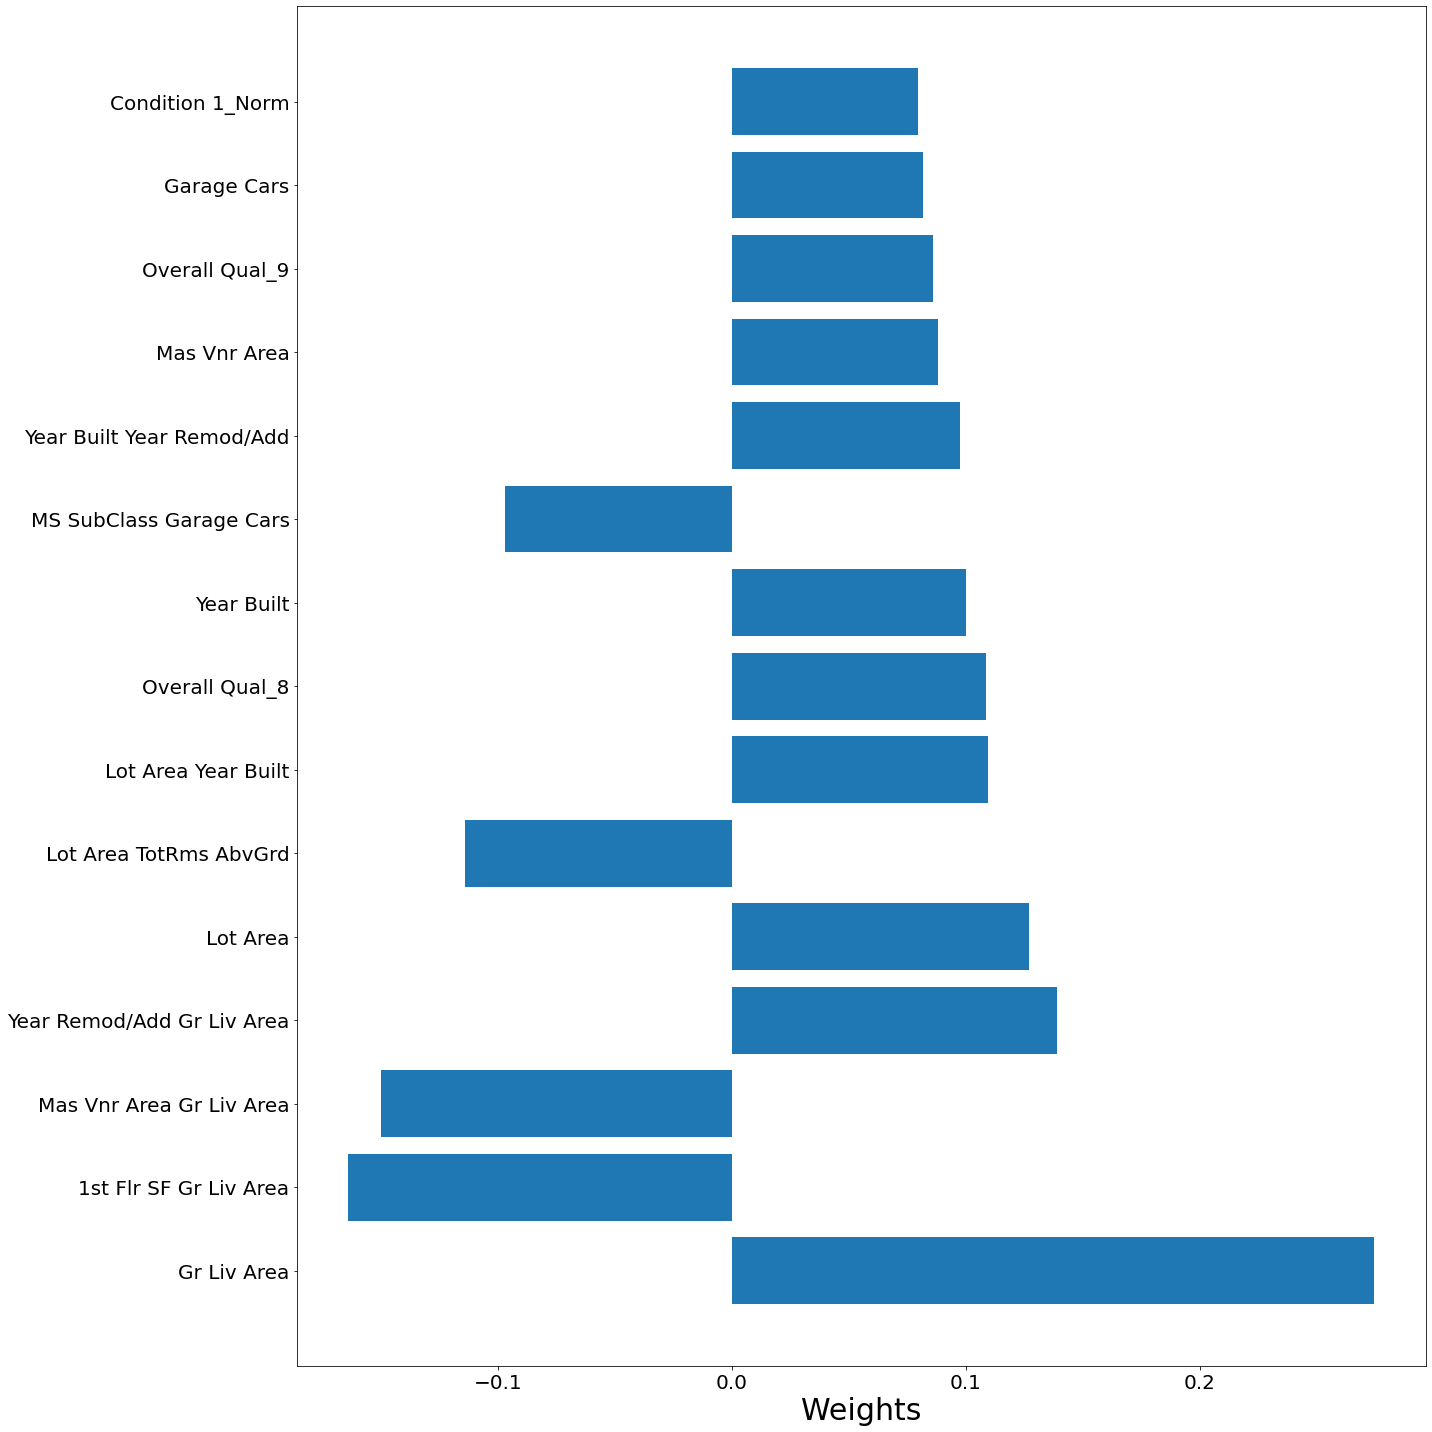

In [87]:
plt.figure(figsize=(20,20))
plt.barh(labels, weights)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
#plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()
plt.savefig('../plots/coefficient1.png', dpi=235)

## Create a bar plot of the top 10 coefficients by absolute value of their weights

In [88]:
beta_0 = lr_lasso_im.intercept_

In [89]:
lr_lasso_im.coef_.shape=(1,len(columns ))

In [90]:
betas = pd.DataFrame(lr_lasso_im.coef_,columns=columns).T

In [91]:
betas.columns = ['weights']

In [92]:
betas['abs_w'] = betas.weights.abs()

In [93]:
weights = betas.sort_values('abs_w', ascending=False)['weights'].head(15)

In [94]:
labels = weights.index

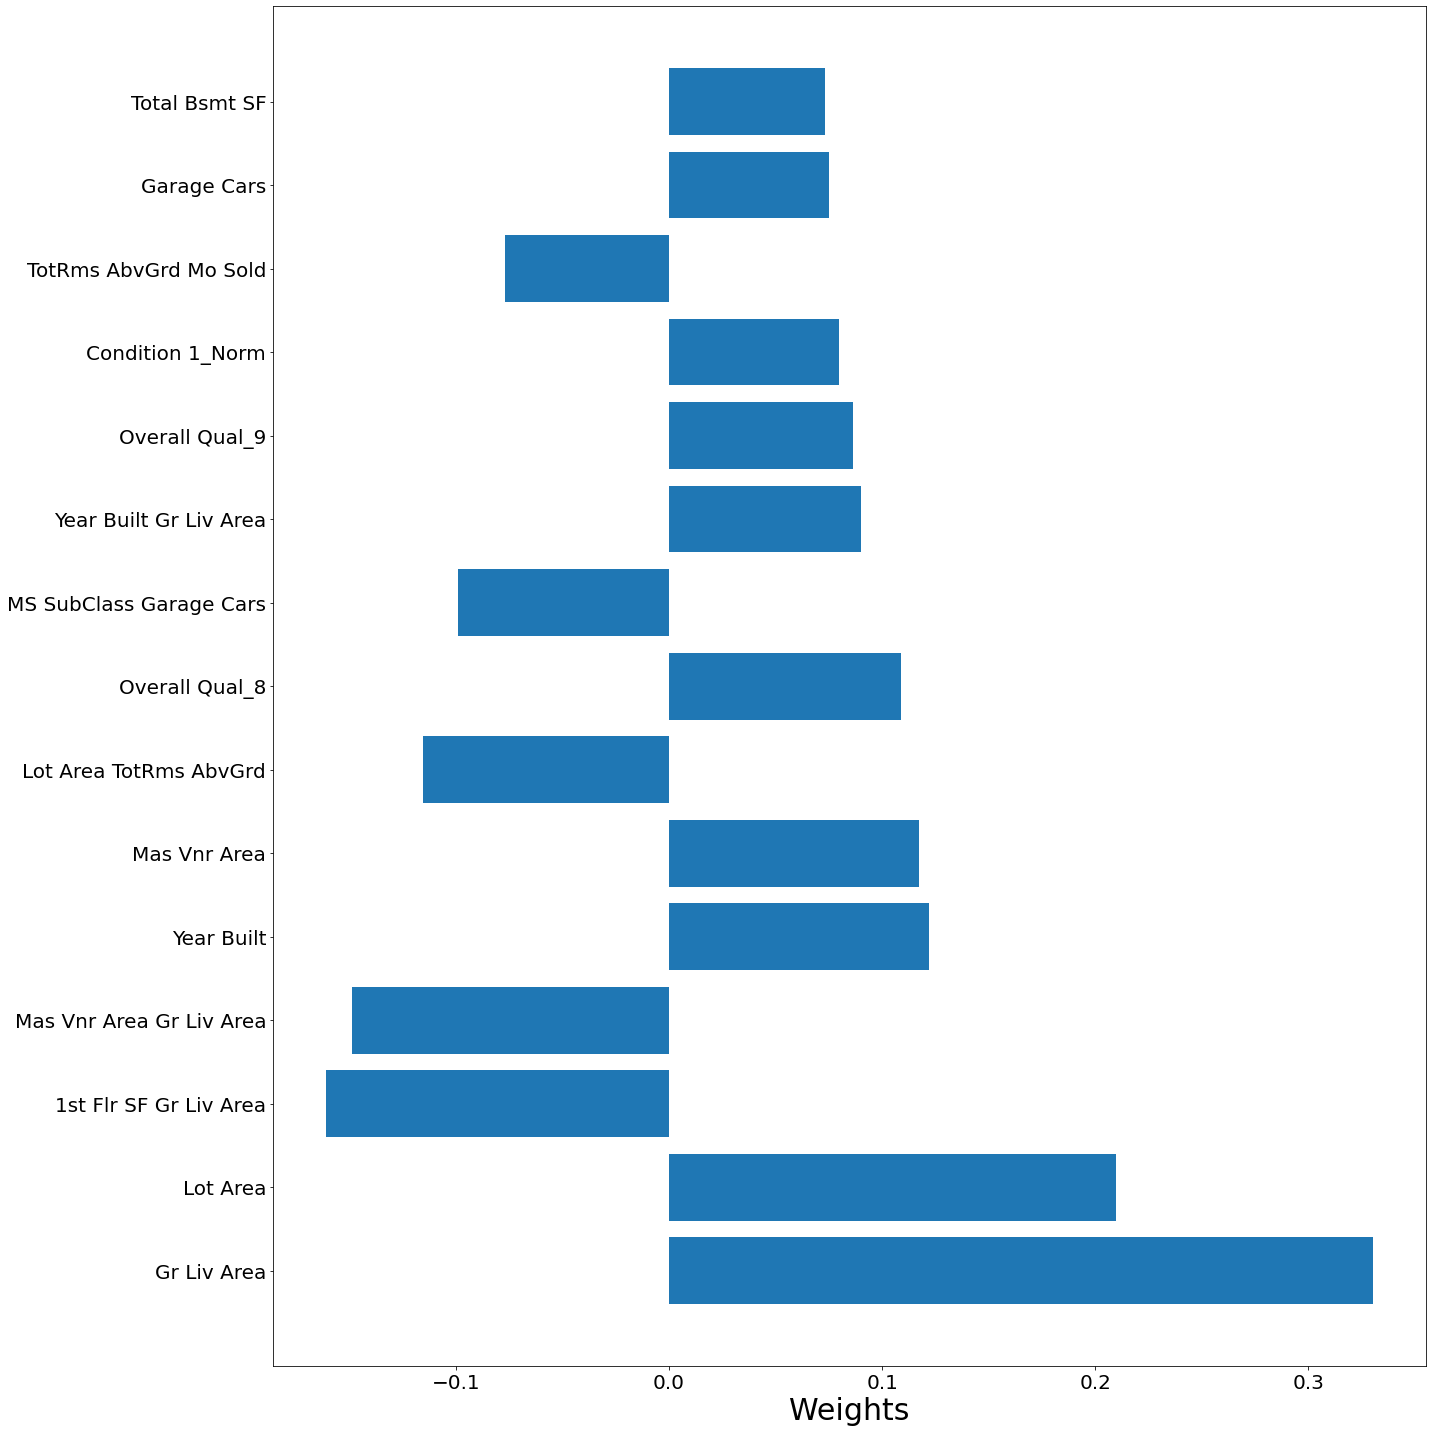

In [95]:
plt.figure(figsize=(20,20))
plt.barh(labels, weights)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
#plt.title(f'Most Important Features and Weights\ny intercept: ${beta_0:0.02f}', fontsize=42)
plt.tight_layout()
plt.savefig('../plots/coefficient2.png', dpi=235)

## Let's pickle our model so we can use it later to make predictions

In [96]:
with open('../assets/lin_reg.pkl', 'wb+') as f:
    pickle.dump(lr_lasso, f)

In [97]:
with open('../assets/lin_reg_im.pkl', 'wb+') as f:
    pickle.dump(lr_lasso_im, f)

In [98]:
with open('../assets/lin_reg_im2.pkl', 'wb+') as f:
    pickle.dump(lr_ridge_im, f)